# Binary valued data, i.e. $\mathbb{S}_0$, on grid-graph, i.e. $\mathbb{S}_0$-image

### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [94]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import time

import PIL
from matplotlib import image
from matplotlib import pyplot

import condat_tv
import cvxpy as cp

import imp

In [95]:
import dots

In [96]:
imp.reload(dots)

<module 'dots' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/dots.py'>

### Generating signals 

- Data : thruth signal 
- Noise : noised signal by Gaussian

In [25]:
Noise, Data = dots.qr_code_gen(20,0.5,10)

standard deviation : sigma = 0.7071067811865476


### Main algorithm

- ADMM_red : solving the proposed simplified and generalized convex optimization problem in ...
- ANISO-TV : solving the complex-valued S_1-model proposed by Condat ...
- TV : solving the state-of-the-art unconstrained TV problem 

0.9966043824974411

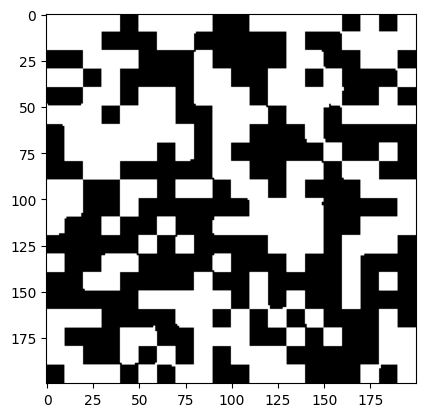

In [26]:
q_condat = dots.ADRA(Noise, 1, 0.7, 100)

q_sig = np.sign(q_condat)

plt.figure(0)
plt.imshow(q_sig, cmap='Greys')

s = dots.MIoU_cut(Data, q_sig)
np.nanmean(s)

In [34]:
r, q_aniso = dots.AnisotropicTV_image(1/2*(1+Noise), 1/2*(1+Data), 1.6)

RMSE 		| MAE 		| MioU
--------------------------------------------------
  1.93e+03  	|    9.64e+02  	|   9.76e-01


In [71]:
q_tv_box, qz = dots.ADMM_TV_BOX_image(Noise, Data, mu=0.6, rho=10, iter=1001)

iter. 	| funv-value 		| RMSE 		| MAE 		| error 	| MioU
-----------------------------------------------------------------------------------------
0  	|  53403.31003678457  	|    3.31e+04  	|    3.64e+04  	|    4.55e-03  	|   9.96e-01
50  	|  24201.188259834125  	|    2.60e+02  	|    1.96e+02  	|    1.61e-04  	|   9.96e-01
99  	|  24282.46076007767  	|    1.60e+01  	|    1.44e+02  	|    9.94e-05  	|   9.96e-01


In [85]:
s = dots.MIoU_cut(Data, (q_aniso-0.5)*2)
t = dots.MIoU_cut(Data, np.sign(q_tv_box))

print('\t ANISO-TV \t| fast-ADMM-TV')
print('MIoU =', "%10.2e"% np.nanmean(s), '\t|', "%10.2e"% np.nanmean(t))
print('RMSE =', "%10.2e"% (np.linalg.norm(Data - (q_aniso-0.5)*2)/np.sqrt(np.size(Data))), '\t|', "%10.2e"% (np.linalg.norm(Data - q_tv_box)/np.sqrt(np.size(Data))))
print('MSE =', "%10.2e"% (np.linalg.norm(Data - (q_aniso-0.5)*2)**2/np.size(Data)), '\t|', "%10.2e"%  (np.linalg.norm(Data - q_tv_box)**2/np.size(Data)))
print('MAE =', "%10.2e"% (np.sum(np.abs(Data - (q_aniso-0.5)*2))/np.size(Data)), '\t|', "%10.2e"% (np.sum(np.abs(Data - q_tv_box))/np.size(Data)))


	 ANISO-TV 	| fast-ADMM-TV
MIoU =   9.76e-01 	|   9.96e-01
RMSE =   2.20e-01 	|   8.24e-02
MSE =   4.82e-02 	|   6.79e-03
MAE =   2.41e-02 	|   4.26e-03


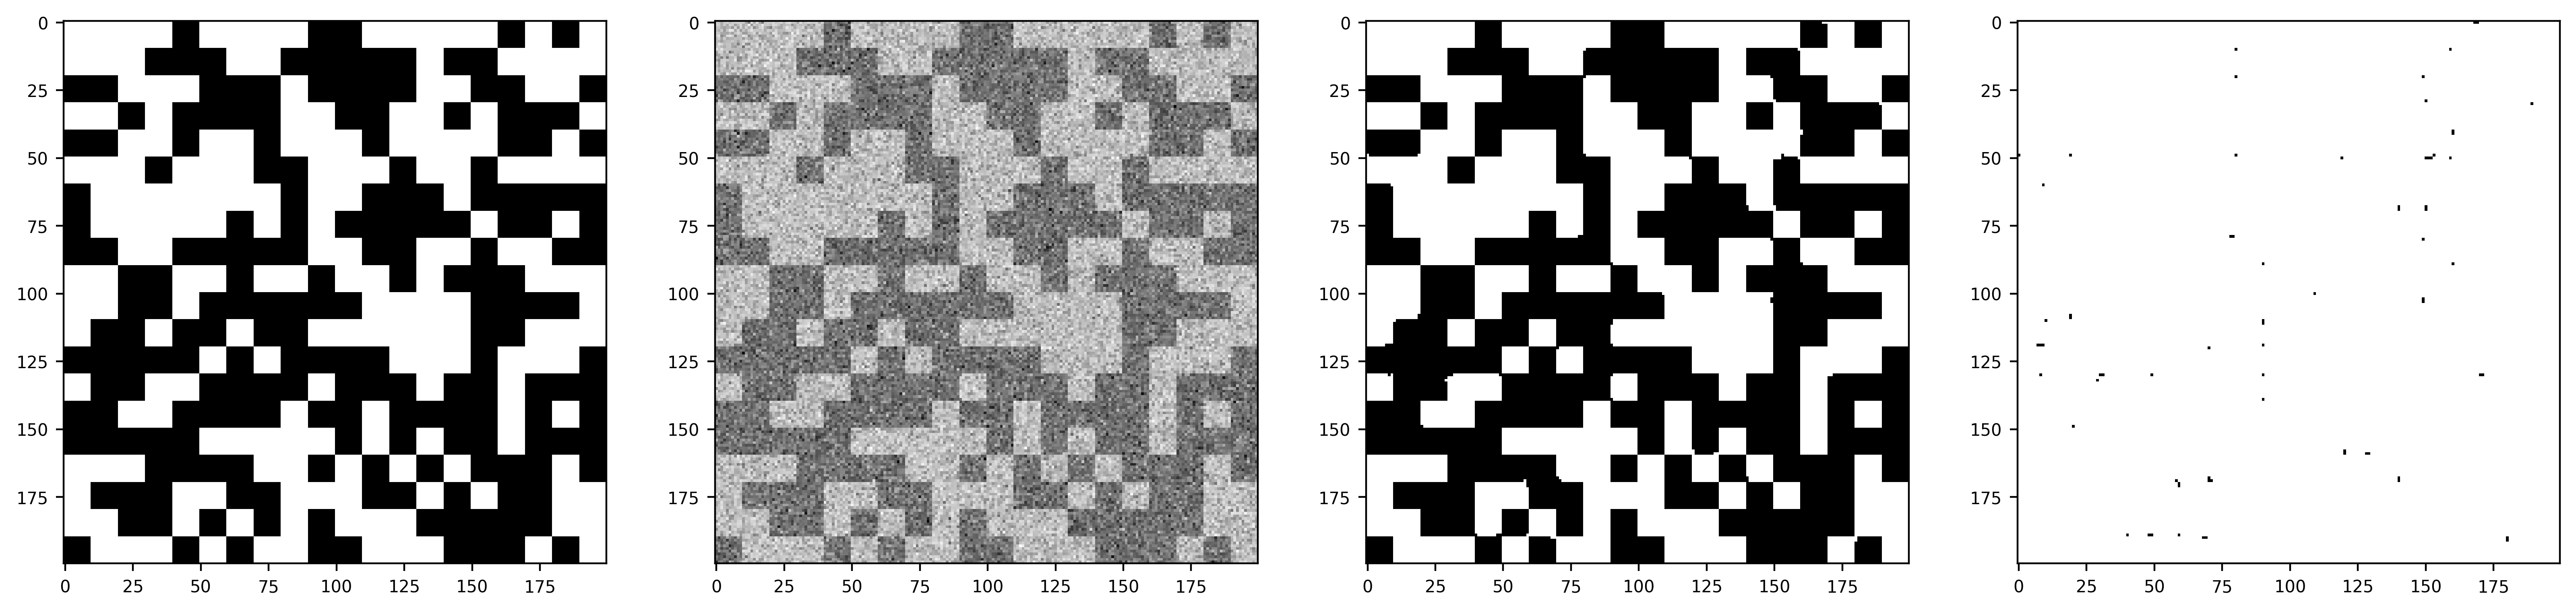

In [93]:
dots.qr_code_plt(Data, Noise, np.sign(q_tv_box))

In [97]:
F = dots.mask(20,10,q_tv_box)

In [98]:
q_rest = dots.ISTA(20,10,F,q_tv_box,Data)

iteration 0 9.616989915367764
iteration 1 7.065365402168531
iteration 2 5.5037484760223085
iteration 3 4.428375329707749
iteration 4 3.649640331296553
iteration 5 3.0713717512910437
iteration 6 2.636073436997574
iteration 7 2.305975445370796
iteration 8 2.0547102523569576
iteration 9 1.8631006378465416
iteration 10 1.716830192398417
iteration 11 1.6050569391229332
iteration 12 1.5195229818278364
iteration 13 1.4539366017475885
iteration 14 1.4035150168329236
iteration 15 1.3646326651968639
iteration 16 1.3345468855816847
iteration 17 1.3111844872703466
iteration 18 1.292977318767477
iteration 19 1.2787370018583173
iteration 20 1.267560410555998
iteration 21 1.2587588259223603
iteration 22 1.2518050333547777
iteration 23 1.2462938605760534
iteration 24 1.2419127110059334
iteration 25 1.2384195037328871
iteration 26 1.2356260982402087
iteration 27 1.233385787058454
iteration 28 1.2315838149472151
iteration 29 1.230130159156891
iteration 30 1.2289540069205334
iteration 31 1.22799951329375

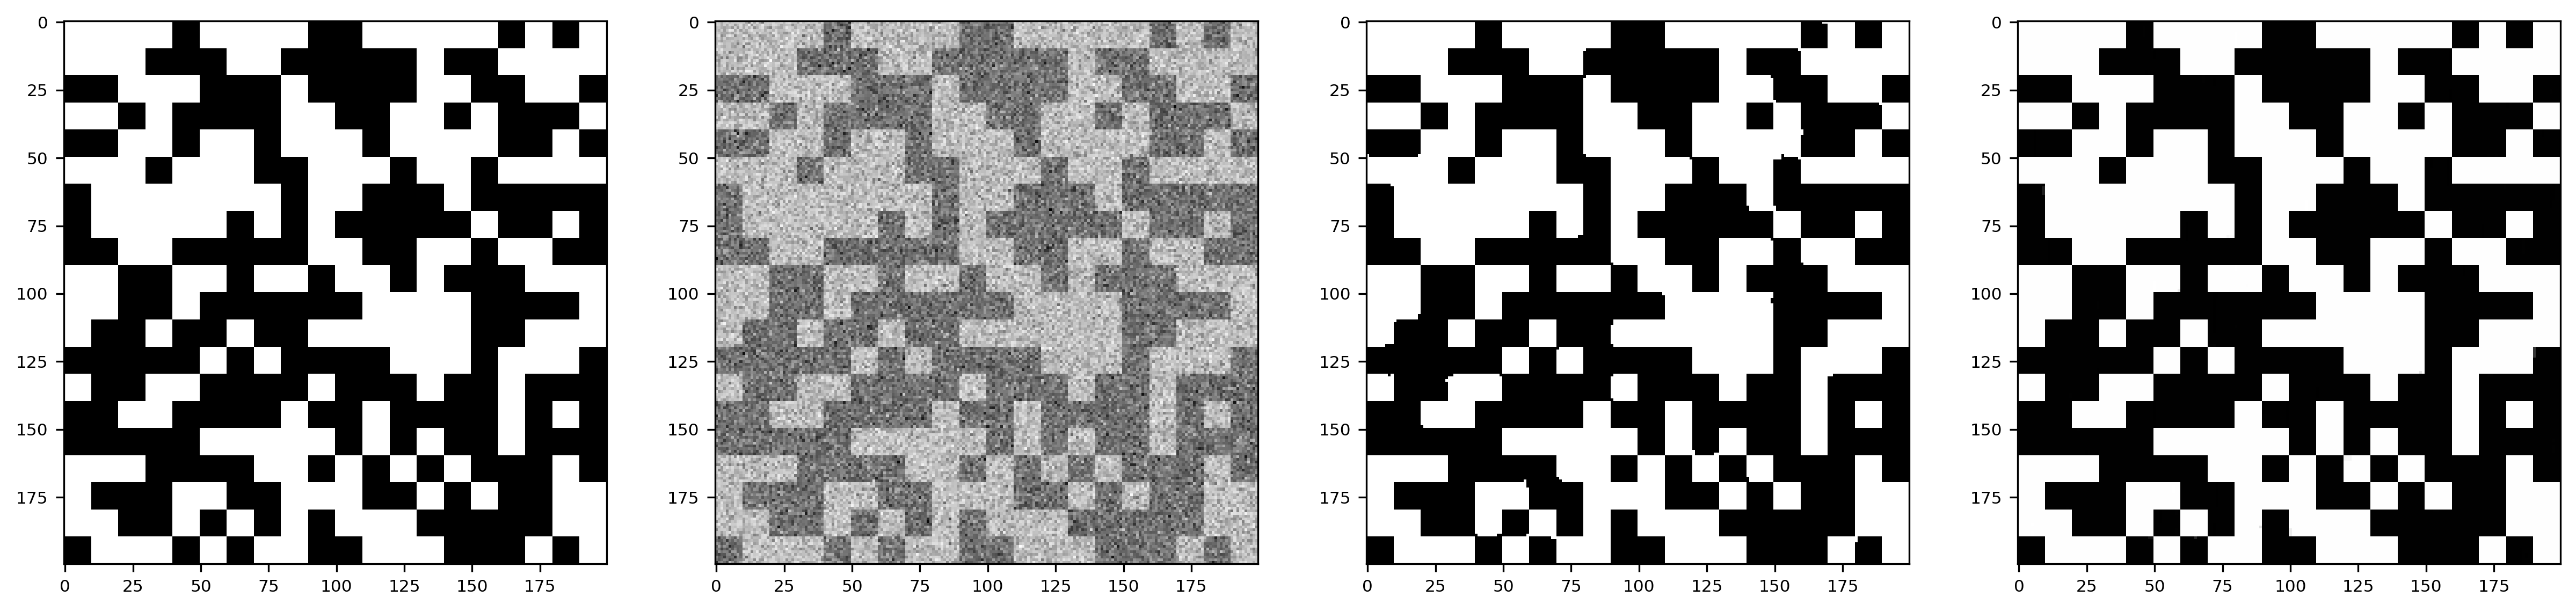

In [99]:
dots.qr_code_improve_ista_plt(Data, Noise,np.sign(q_tv_box),q_rest)

In [101]:
s = dots.MIoU(Data, q_rest)

print('MIoU =', np.nanmean(s))
print('RMSE =', np.linalg.norm(Data - q_rest)/np.sqrt(np.size(Data)))
print('MSE =', np.linalg.norm(Data - q_rest)**2/np.size(Data))
print('MAE =', np.sum(np.abs(Data - q_rest))/np.size(Data))

MIoU = 1.0
RMSE = 0.006117123751291391
MSE = 3.741920298861326e-05
MAE = 0.0005275894256584744


Segmentation samples

In [103]:
from matplotlib import image
from matplotlib import pyplot

#image = image.imread('cameraman.jpg')
#image = image.imread('reichstag_schwarz.jpeg')
#image = image.imread('math_building_1.jpeg')
#image = image.imread('brandenburg_gate.jpeg')
image = image.imread('concert_hall_1.jpeg')

In [104]:
print(image.dtype)
print(image.shape)

uint8
(256, 256)


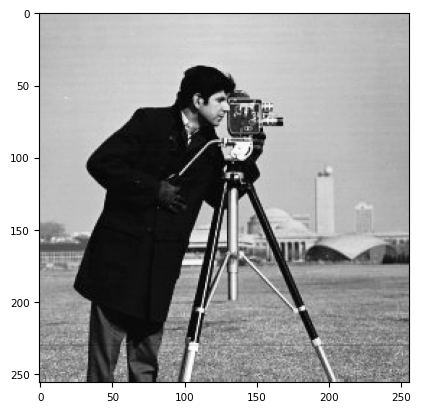

In [105]:
#x = -1*image[:,:,0]/np.max(image[:,:,0])*2 + 1
x = -1*image[:,:]/np.max(image[:,:])*2 + 1
#x = -image[:,:,0]

#bias = -3/4
#bias = -5/6
#bias = -2/3
bias = 0
#bias = -1/2
#bias = -4/6

x = x + bias

pyplot.imshow(x, cmap='Greys')

In [108]:
x_reshape = x
n,m = np.shape(x_reshape)
k = 0
for i in range(n):
    for j in range(m):
        if x[i,j] == 0:
            print('zero at position', (i,j))
            x_reshape[i,j] = 0.00001
            k = k +1
print(k)


0


In [109]:
qr, gz = dots.ADMM_TV_BOX_image(x_reshape, np.zeros(np.shape(x_reshape)), 0.1, 10, 100)

iter. 	| funv-value 		| RMSE 		| MAE 		| spherical-error 	| MioU
-----------------------------------------------------------------------------------------
0  	|  13091.345809593784  	|    1.52e+02  	|    2.50e+03  	|    3.76e-03  	|   2.93e-01
50  	|  17662.964129171414  	|    5.07e+04  	|    5.39e+04  	|    1.41e-03  	|   2.91e-01
100  	|  22208.31042545839  	|    5.61e+04  	|    5.84e+04  	|    1.06e-03  	|   2.91e-01
150  	|  24966.17851672954  	|    5.91e+04  	|    6.07e+04  	|    8.64e-04  	|   2.91e-01
200  	|  26499.439029059824  	|    6.08e+04  	|    6.19e+04  	|    7.51e-04  	|   2.91e-01
250  	|  27432.734615536123  	|    6.18e+04  	|    6.27e+04  	|    6.76e-04  	|   2.91e-01
300  	|  28002.0644518079  	|    6.24e+04  	|    6.31e+04  	|    6.22e-04  	|   2.91e-01
350  	|  28422.645261129644  	|    6.28e+04  	|    6.34e+04  	|    5.80e-04  	|   2.91e-01
400  	|  28755.78286595657  	|    6.31e+04  	|    6.37e+04  	|    5.47e-04  	|   2.91e-01
450  	|  28995.307285742452  	|   

KeyboardInterrupt: 

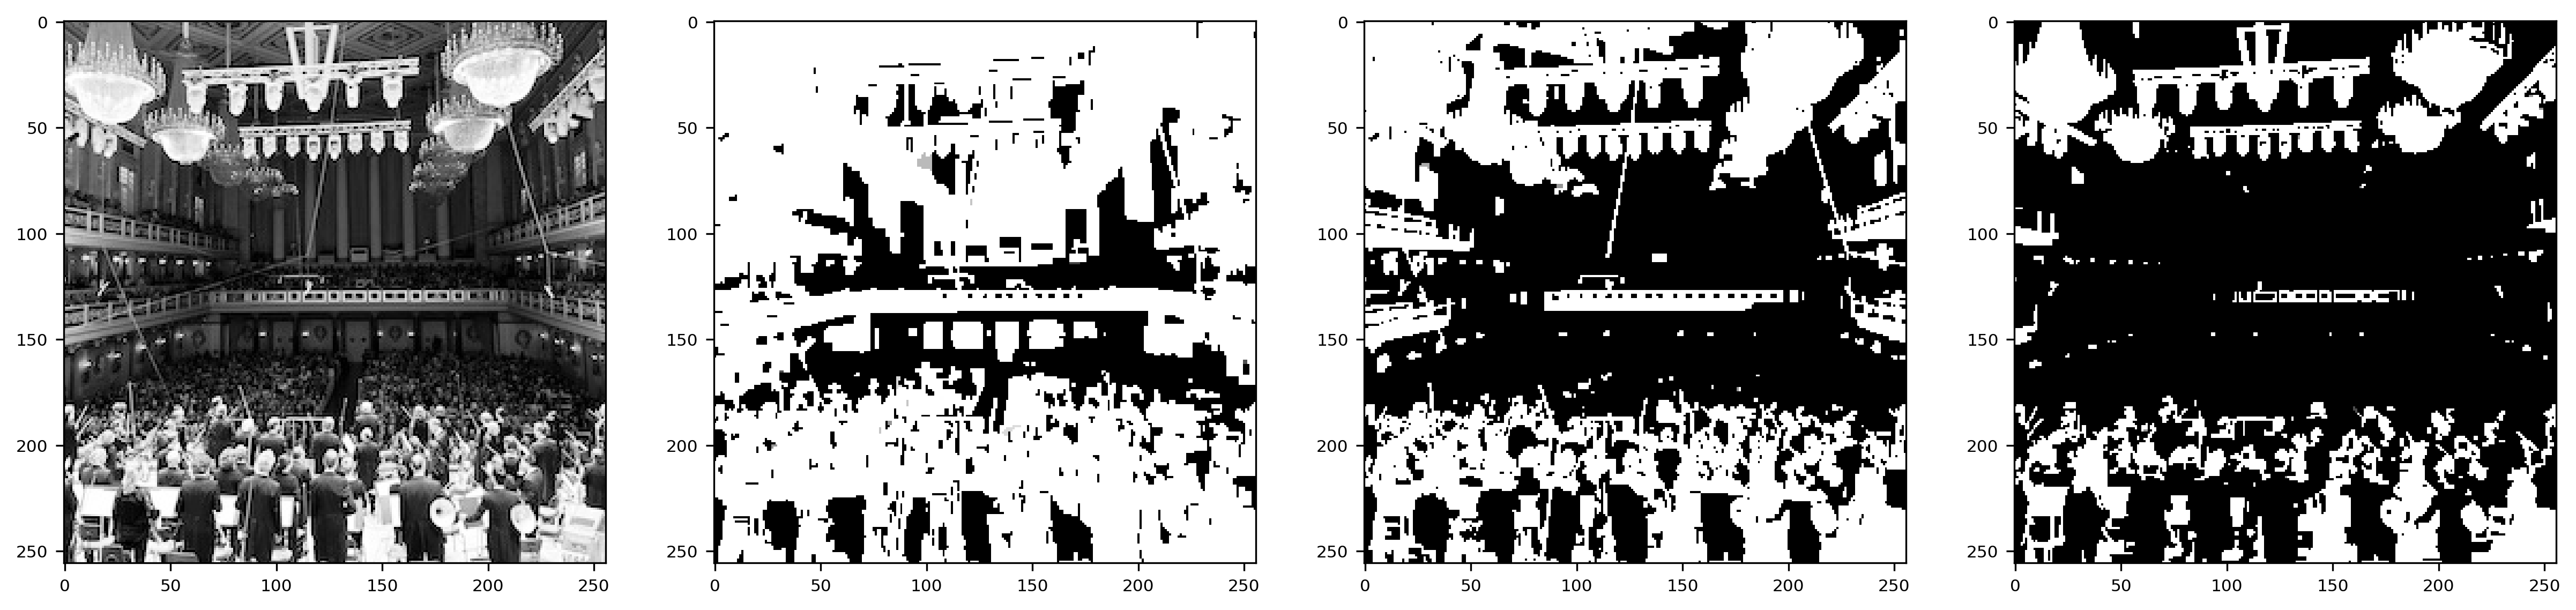

In [139]:
fig = plt.figure(0,figsize=(20,5), dpi = 3*100)
plt.rc('font', size=7.5) 

ax = fig.add_subplot(1, 4, 1)
ax.imshow(x, cmap='Greys')

ax1 = fig.add_subplot(1, 4, 2)
ax1.imshow(qrrr, cmap='Greys')

ax2 = fig.add_subplot(1, 4, 3)
ax2.imshow(qr, cmap='Greys')

ax3 = fig.add_subplot(1, 4, 4)
ax3.imshow(qrr, cmap='Greys')
plt.savefig("S0_2D_segmentation_concert_hall_1.pdf",dpi=400)